## House Rent Prediction Using Linear Regression

### Objective

Build a predictive model using Linear Regression to estimate house rent based on features
from the provided dataset. This project helps understand data preprocessing, EDA,
regression modeling, evaluation metrics, and visualization.


### About
The dataset contains 4700+ listings of rental properties across India, covering a wide
spectrum from huts to high-rise apartments. It includes features like size, number of
bedrooms, furnishing status, tenant preferences, locality, and more


In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Load the dataset

In [117]:
data=pd.read_csv("House_Rent_Dataset.csv")
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


BHK: Number of Bedrooms, Hall, Kitchen.

Rent: Rent of the Houses/Apartments/Flats.

Size: Size of the Houses/Apartments/Flats in Square Feet.

Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

Area Locality: Locality of the Houses/Apartments/Flats.

City: City where the Houses/Apartments/Flats are Located.

Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.

Bathroom: Number of Bathrooms.

Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.

In [118]:
data.shape

(4746, 12)

In [119]:
data['Posted On'] = pd.to_datetime(data['Posted On'])

In [120]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Posted On          4746 non-null   datetime64[ns]
 1   BHK                4746 non-null   int64         
 2   Rent               4746 non-null   int64         
 3   Size               4746 non-null   int64         
 4   Floor              4746 non-null   object        
 5   Area Type          4746 non-null   object        
 6   Area Locality      4746 non-null   object        
 7   City               4746 non-null   object        
 8   Furnishing Status  4746 non-null   object        
 9   Tenant Preferred   4746 non-null   object        
 10  Bathroom           4746 non-null   int64         
 11  Point of Contact   4746 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 445.1+ KB


No null value is present in the dataset


4 Numerical columns: ['BHK', 'Rent', 'Size', 'Bathroom']

8 Non-numerical columns: ['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']

In [121]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Posted On,4746,2022-06-07 18:01:40.126422272,2022-04-13 00:00:00,2022-05-20 00:00:00,2022-06-10 00:00:00,2022-06-28 00:00:00,2022-07-11 00:00:00,NaN
BHK,4746.0,2.08386,1.0,2.0,2.0,3.0,6.0,0.832256
Rent,4746.0,34993.451327,1200.0,10000.0,16000.0,33000.0,3500000.0,78106.412937
Size,4746.0,967.490729,10.0,550.0,850.0,1200.0,8000.0,634.202328
Bathroom,4746.0,1.965866,1.0,1.0,2.0,2.0,10.0,0.884532


Average rent is 34993.45
Rent is highly right Skewed
Average size of house is 967.49

In [122]:
# checking for duplicate values
data.duplicated().sum()

np.int64(0)

No Duplicate rows are present

In [123]:
data['Size'].max()

8000

In [124]:
data['Rent'].max()

3500000

In [125]:
# unique values in each column
unique_values=data.nunique()
print(unique_values)

Posted On              81
BHK                     6
Rent                  243
Size                  615
Floor                 480
Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
Bathroom                8
Point of Contact        3
dtype: int64


BHK
2    2265
1    1167
3    1098
4     189
5      19
6       8
Name: count, dtype: int64


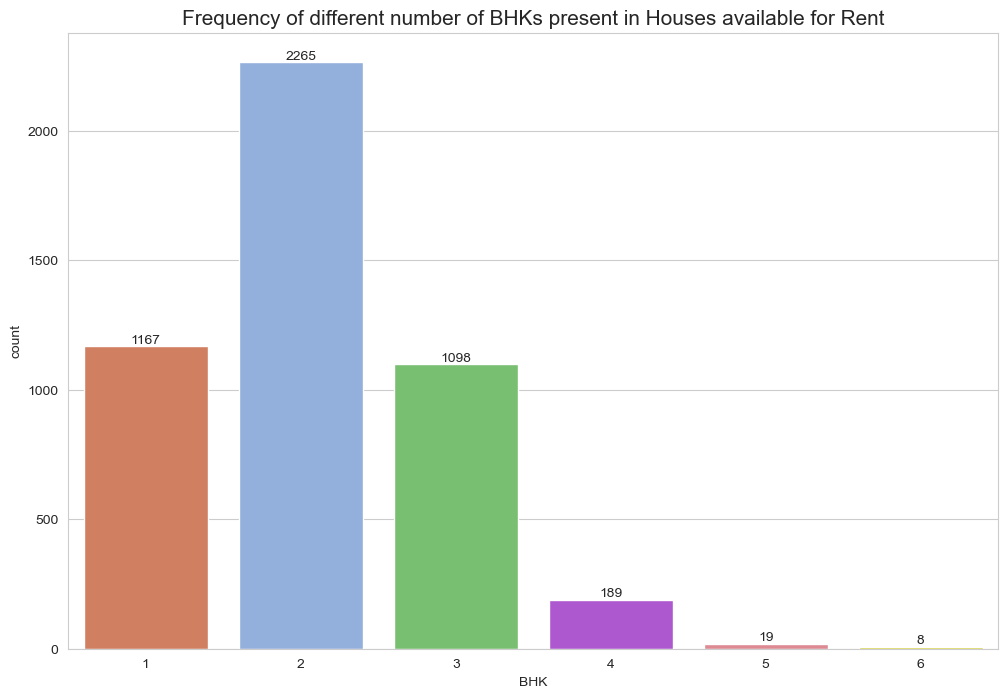

In [126]:
print(data['BHK'].value_counts())
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509']

ax = sns.countplot(x='BHK',data=data, palette=['#e3784d','#87ace8', '#6ecc64','#b644e3','#eb7c87','#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Frequency of different number of BHKs present in Houses available for Rent',fontsize=15)
plt.show()


2 BHK house are rented the most

Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: count, dtype: int64


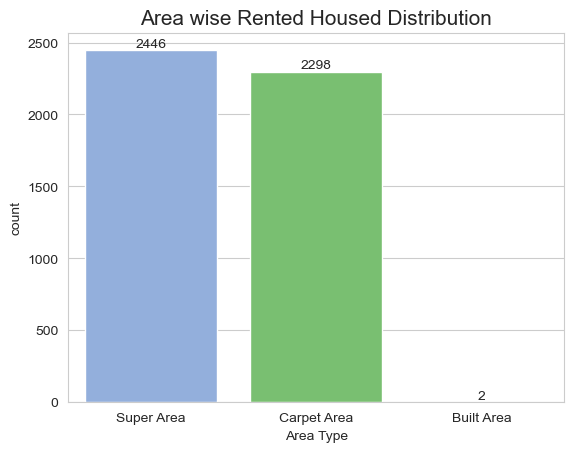

In [127]:
print(data['Area Type'].value_counts() ) 


ax = sns.countplot(x='Area Type',data=data, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Area wise Rented Housed Distribution',fontsize=15)
plt.show()

Super area houses are more put up on rent.
Built Area wise rented houses are very less

Bathroom
2     2291
1     1474
3      749
4      156
5       60
6       12
7        3
10       1
Name: count, dtype: int64


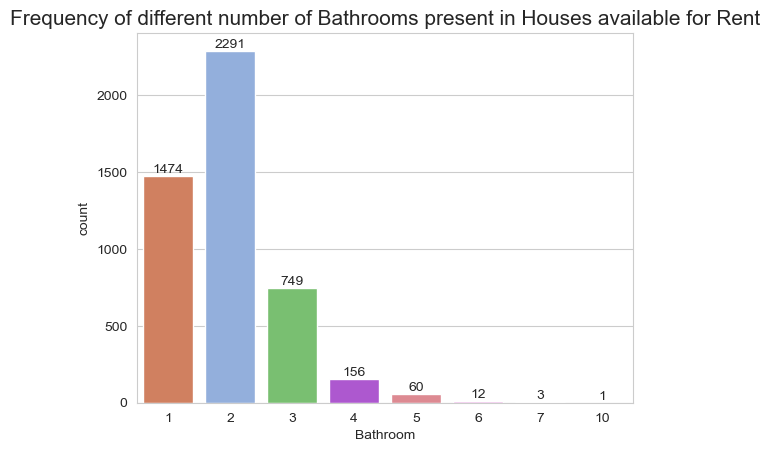

In [128]:
print(data['Bathroom'].value_counts())
sns.set_style('whitegrid')
ax = sns.countplot(x='Bathroom',data=data, palette=['#e3784d','#87ace8', '#6ecc64','#b644e3','#eb7c87','#fab1f3','#86f7d7','#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Frequency of different number of Bathrooms present in Houses available for Rent',fontsize=15)
plt.show()

House with 2 Bathrooms are most common for the houses put up on rent.

In [129]:
print(data['Furnishing Status'].value_counts())


Furnishing Status
Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: count, dtype: int64


Most Rented Houses are semi-furnished

In [130]:
print(data['Tenant Preferred'].value_counts())


Tenant Preferred
Bachelors/Family    3444
Bachelors            830
Family               472
Name: count, dtype: int64


   Most rented houses have no special category. They are okay with both Bachelors and Family.

In [131]:
print(data['Point of Contact'].value_counts())

Point of Contact
Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: count, dtype: int64


In [132]:
print(data['City'].value_counts())
sns.set_style('whitegrid')

fig = px.pie(data, names='City', height=700, width= 700, color_discrete_sequence=px.colors.sequential.deep, title='Pie Chart for Houses available for Rent in different cities')
fig.update_traces(textfont_size=15)
fig.show()

City
Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: count, dtype: int64


Mumbai has the most number of rented houses

### EDA

In [133]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

No null value

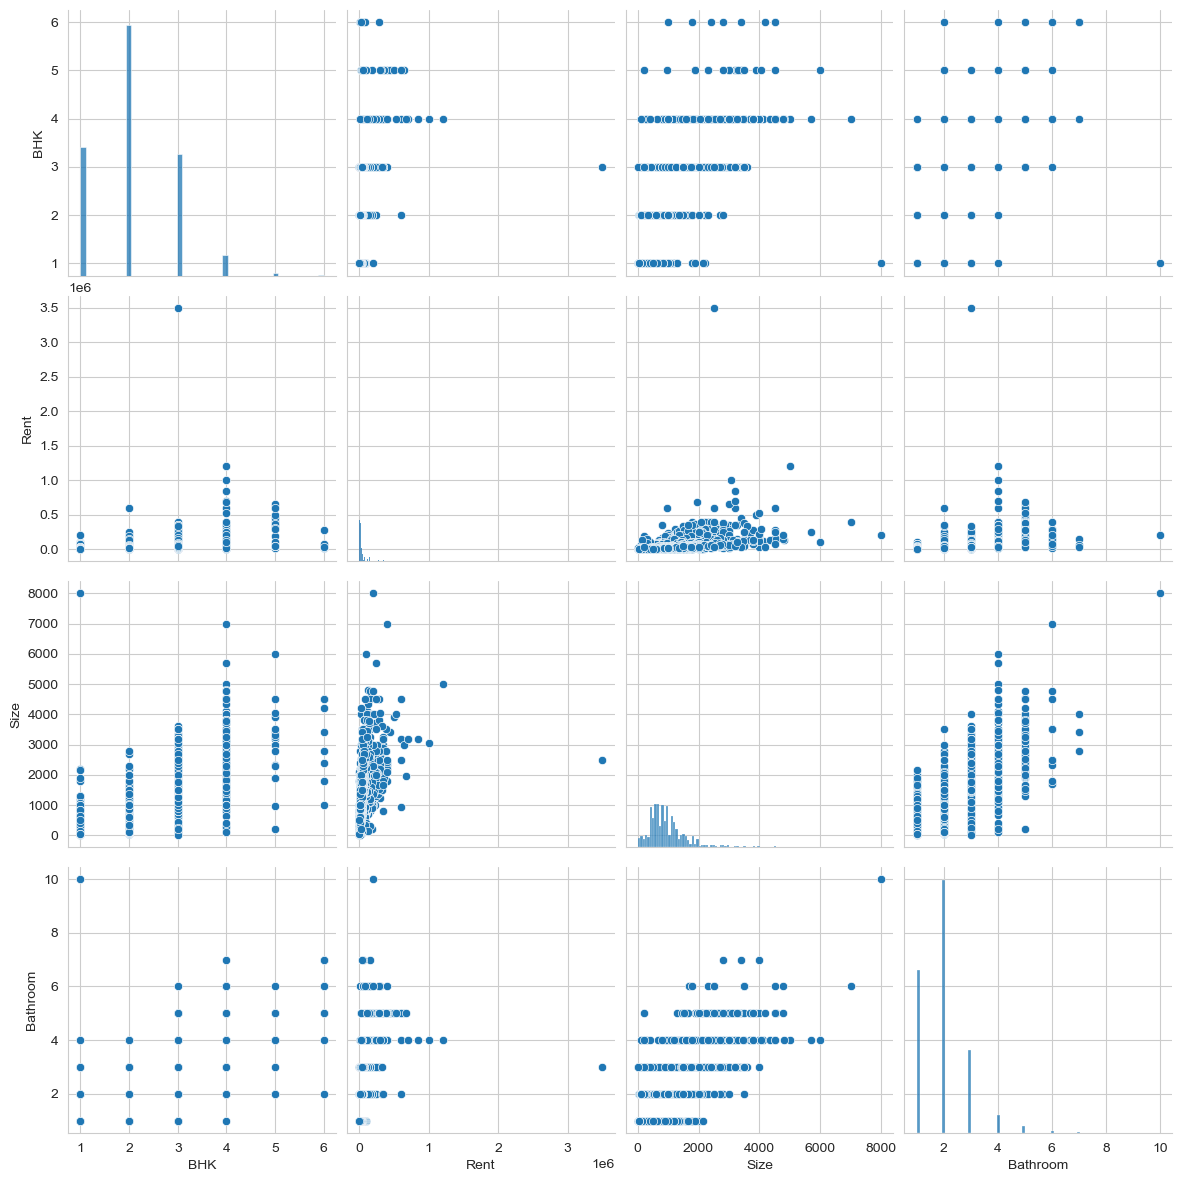

In [134]:
sns.pairplot(data,height=3)
plt.show()

In [135]:
numeric_col = data.select_dtypes(include='number')
numeric_col

,BHK,Rent,Size,Bathroom
0,2,10000,1100,2
1,2,20000,800,1
2,2,17000,1000,1
3,2,10000,800,1
4,2,7500,850,1
...,...,...,...,...
4741,2,15000,1000,2
4742,3,29000,2000,3
4743,3,35000,1750,3
4744,3,45000,1500,2


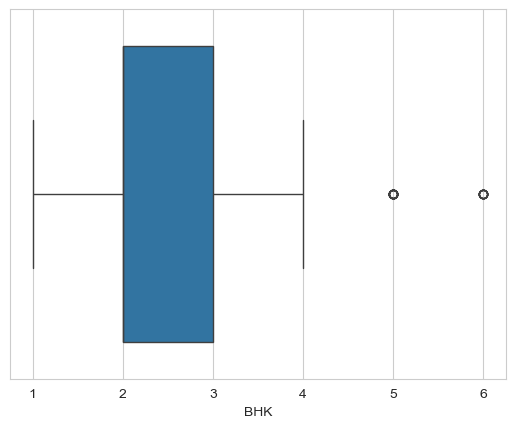

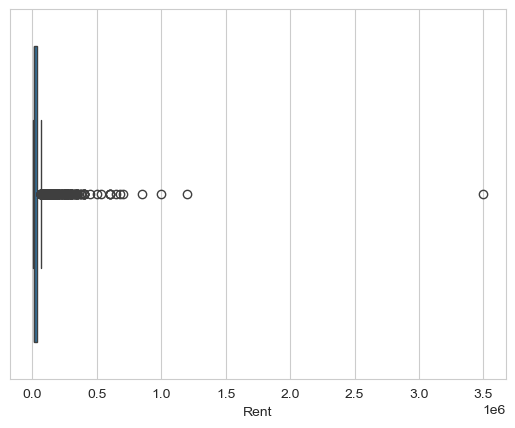

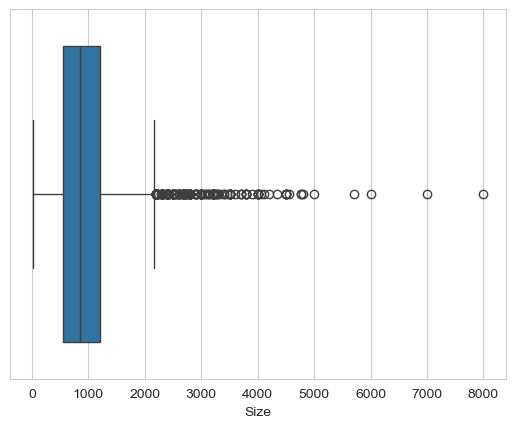

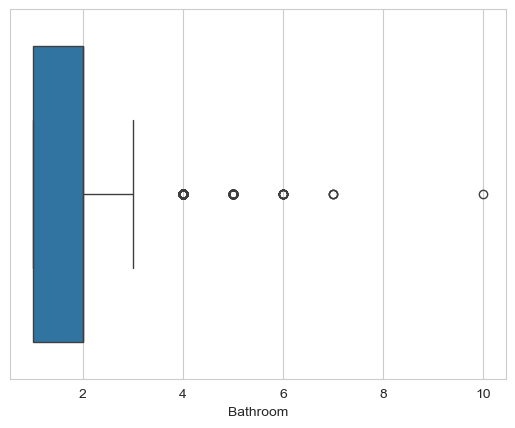

In [136]:
# univariate analysis

for col in numeric_col:
    sns.boxplot(x=data[col])
    plt.xlabel(col)
    plt.show()


Most of the houses are 2 BHK but there are few expensive 5-6 BHK houses 

Most of the houses have affordable rent but some have extreme high rent 

Most of the houses have are small to mid sized but there are a lot of big properties as well

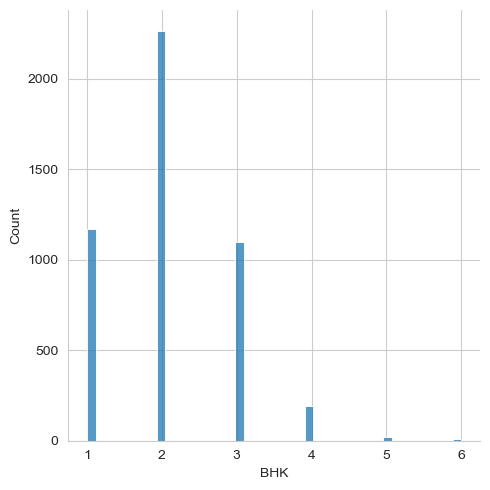

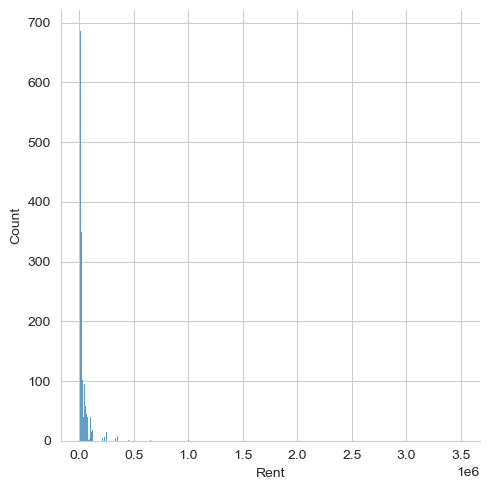

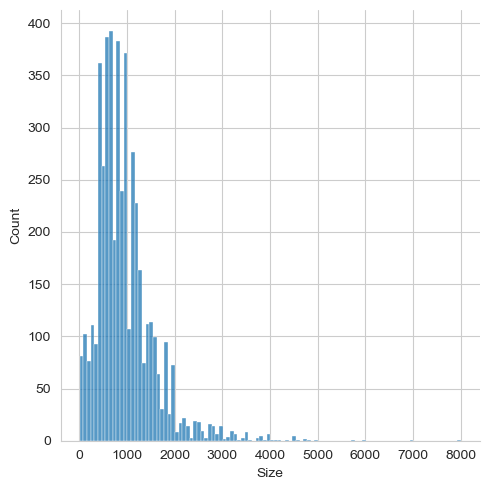

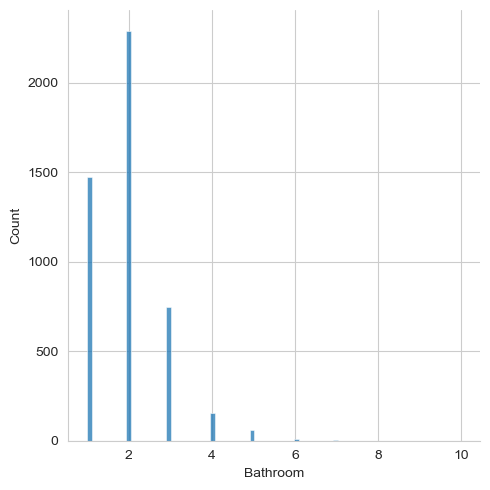

In [137]:

for col in numeric_col:
    sns.displot(x=data[col])
    plt.xlabel(col)
    plt.show()

In [138]:

numeric_col.skew()

BHK          0.599216
Rent        21.409942
Size         2.299892
Bathroom     1.272951
dtype: float64

Rent is right skewed but it is observed that there is one extreme outlier 

In [139]:
print(np.where(data['Rent']>2000000))

(array([1837]),)


In [140]:
data.drop([1837], axis=0, inplace=True)

fig = px.box(data, x="Rent",title='Boxplot for Rent Prices')
fig.show()

### Bivariate Analysis

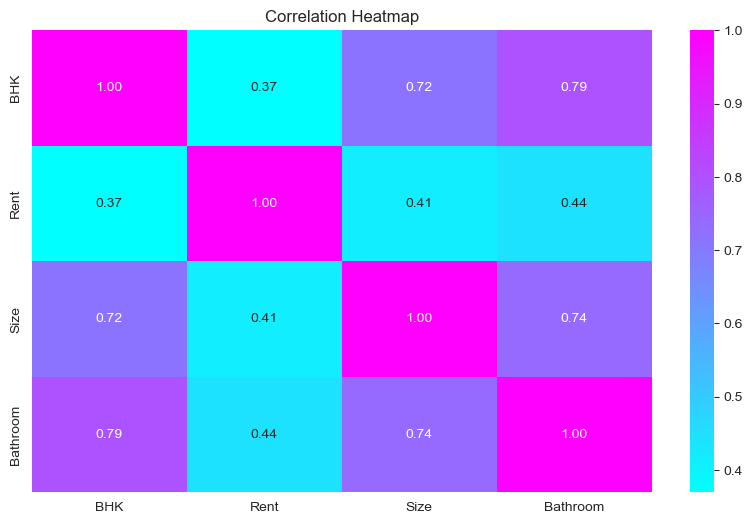

In [141]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_col.corr(), annot=True, cmap='cool', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

 Larger homes tend to have more bathrooms and bedrooms

It is seen that not all big houses have high rent 

Relationship between features and target variable -


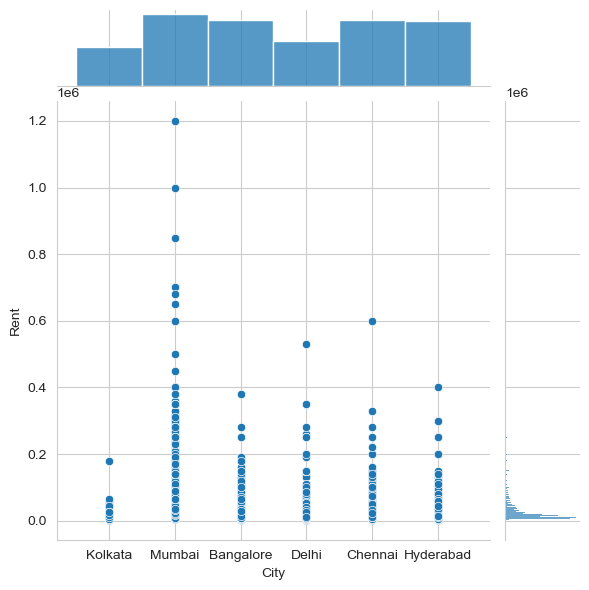

In [157]:
sns.jointplot(data,x='City', y='Rent')
plt.show()


Mumbai is having too much demand for houses, so rent is also very high

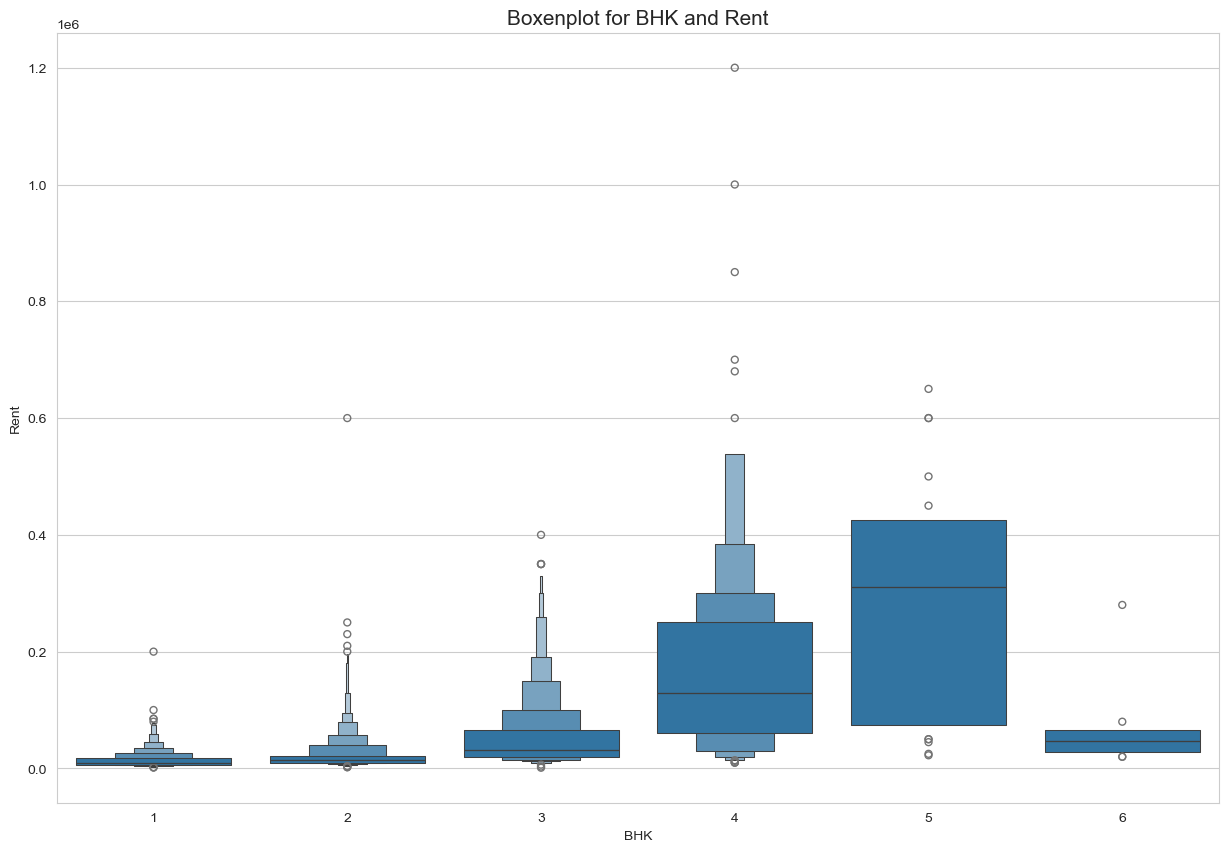

In [158]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="BHK", y='Rent',data=data)
plt.title('Boxenplot for BHK and Rent',fontsize=15)
plt.show()

The rent of the houses is subsequently increasing with increase in BHK.HoweverfFor 6 BHK,  they are less in demand so rent is very less

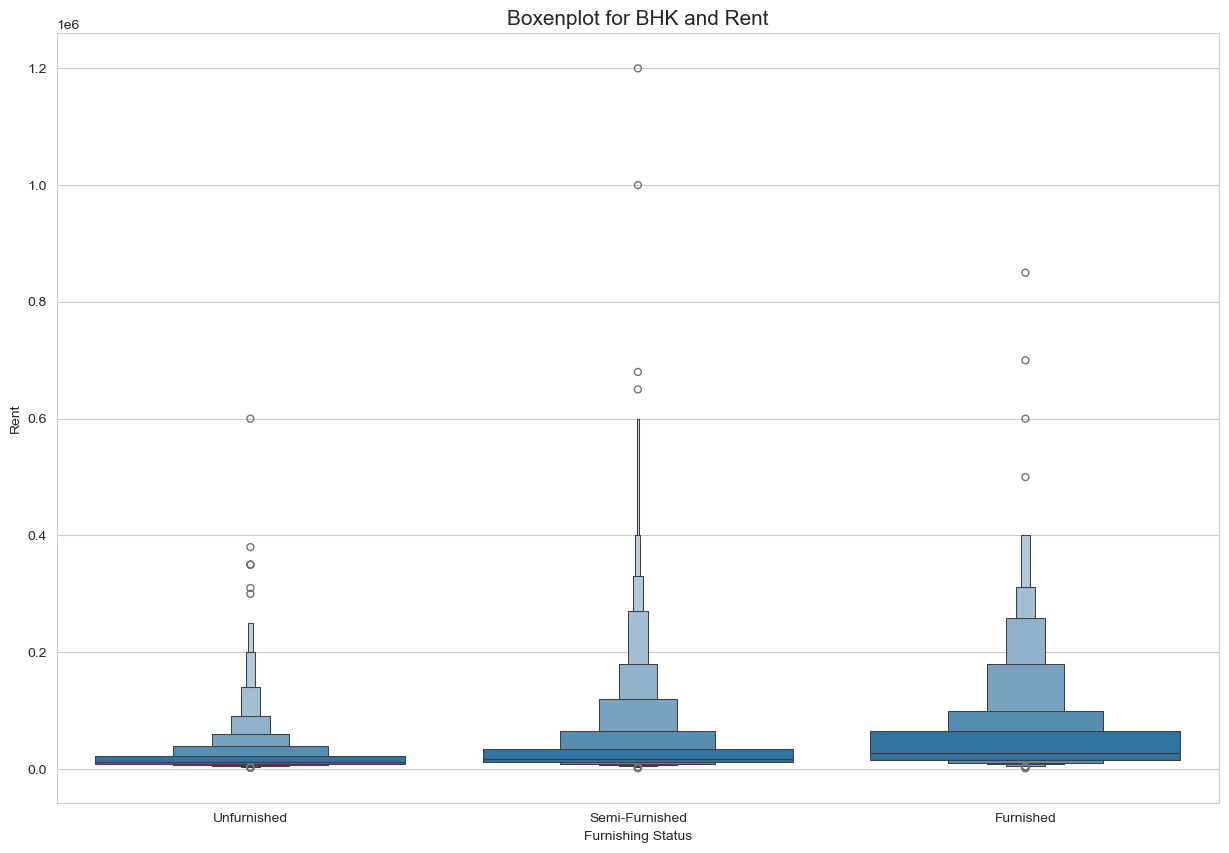

In [152]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Furnishing Status", y='Rent',data=data)
plt.title('Boxenplot for BHK and Rent',fontsize=15)
plt.show()

Unfurnished houses for rent are having less rent as compared to others

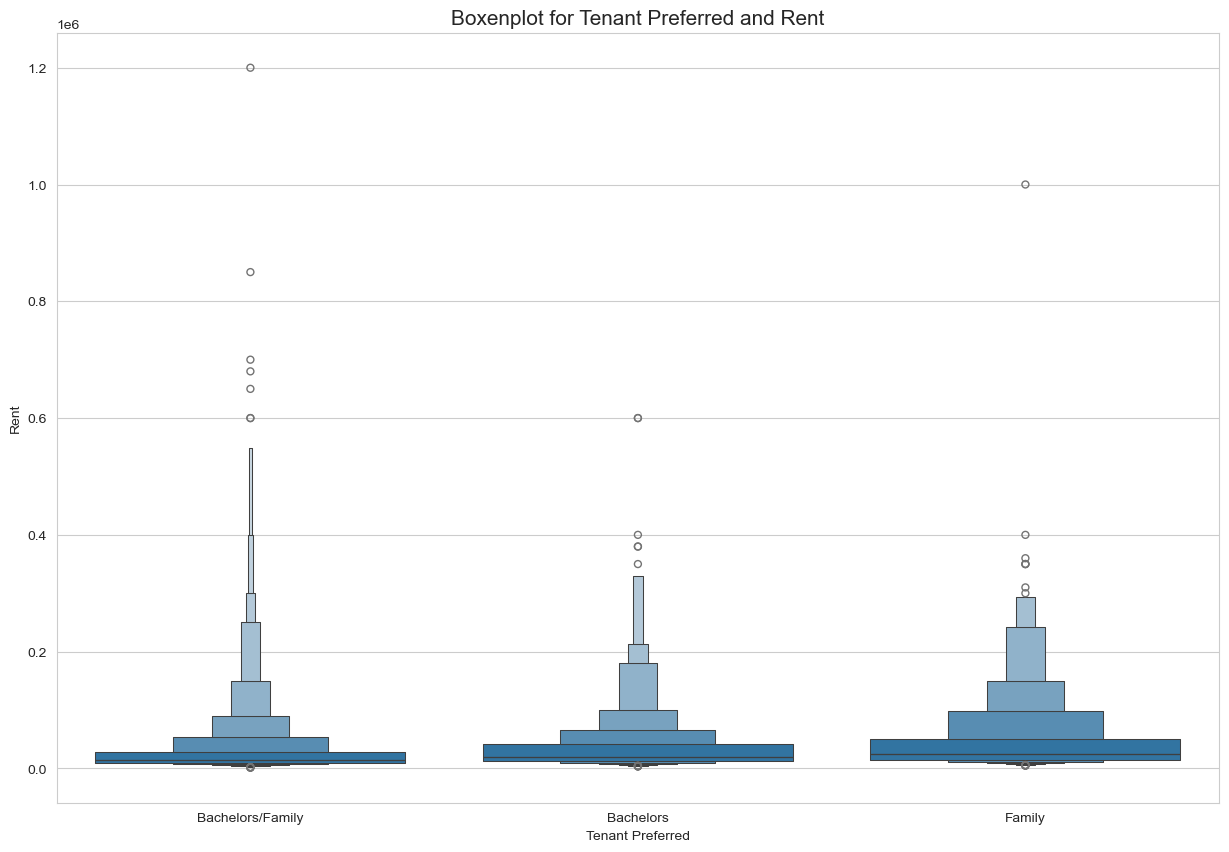

In [153]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Tenant Preferred", y='Rent',data=data)
plt.title('Boxenplot for Tenant Preferred and Rent',fontsize=15)
plt.show()

Houses rented with no tenant conditions are having a bit more rent as compared to others.

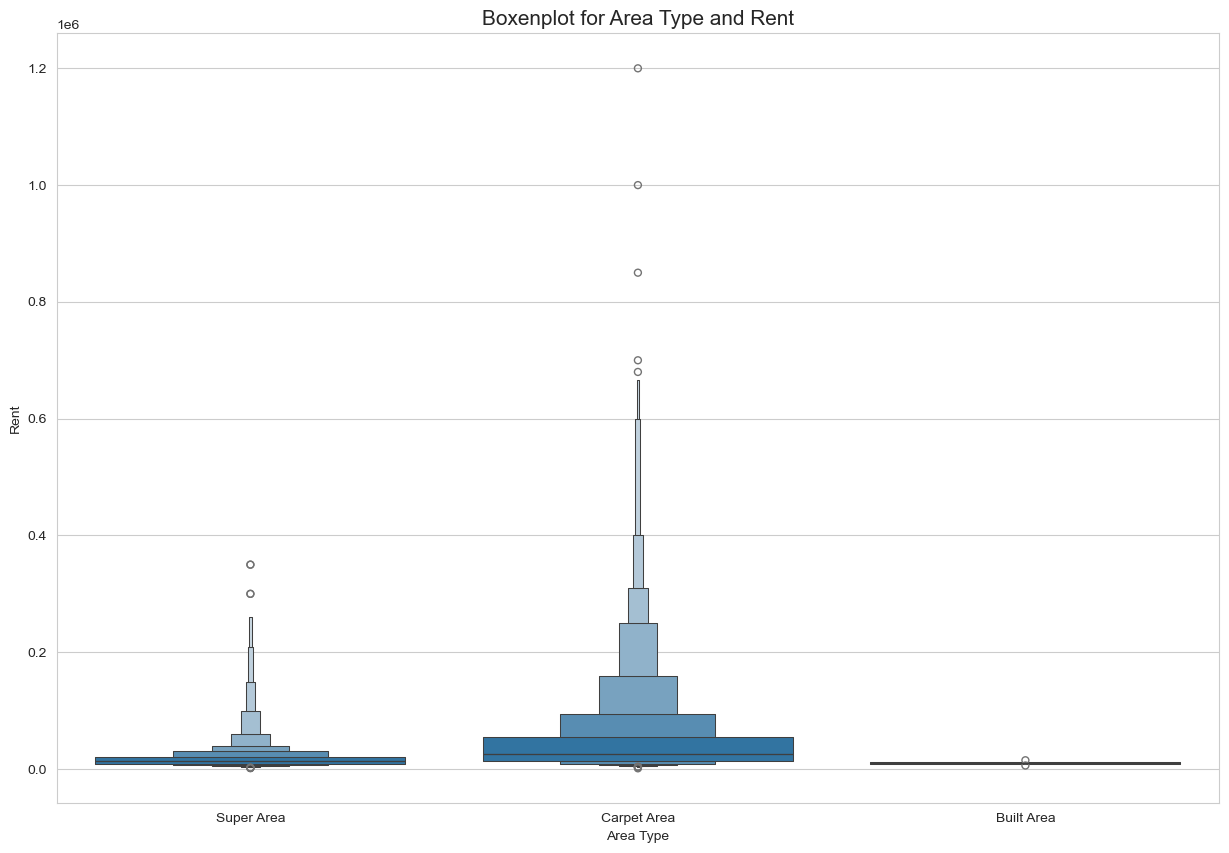

In [154]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Area Type", y='Rent',data=data)
plt.title('Boxenplot for Area Type and Rent',fontsize=15)
plt.show()

Houses with Carpet Area have more rent as compared to Super Area.Built Area are less in demand , so rent is less

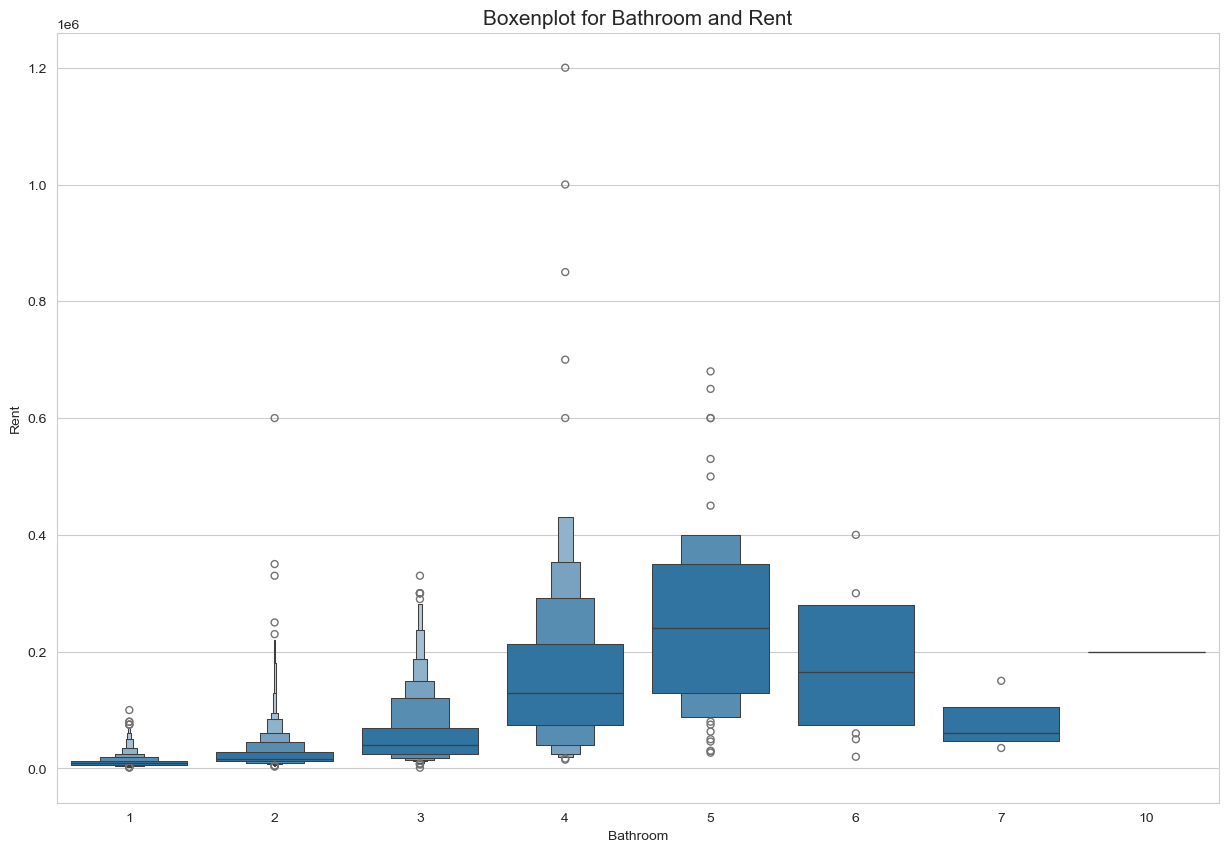

In [155]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Bathroom", y='Rent',data=data)
plt.title('Boxenplot for Bathroom and Rent',fontsize=15)
plt.show()

The House rent is increasing with increase in bathrooms in house, however houses having more number of bathrooms does not look feasiable as they have very less rent.

### Preprocessing

Coversion of Categorical features 


In [162]:
data =data.drop( ['Posted On','Area Locality','Floor','Point of Contact'],axis=1)
data.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1


In [163]:
data = pd.get_dummies(data, columns=['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred'])
data.head()

,BHK,Rent,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,2,10000,1100,2,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False
1,2,20000,800,1,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False
2,2,17000,1000,1,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False
3,2,10000,800,1,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False
4,2,7500,850,1,False,True,False,False,False,False,False,True,False,False,False,True,True,False,False


standardization of numerical features

### Model Building

In [164]:
data.columns

Index(['BHK', 'Rent', 'Size', 'Bathroom', 'Area Type_Built Area',
       'Area Type_Carpet Area', 'Area Type_Super Area', 'City_Bangalore',
       'City_Chennai', 'City_Delhi', 'City_Hyderabad', 'City_Kolkata',
       'City_Mumbai', 'Furnishing Status_Furnished',
       'Furnishing Status_Semi-Furnished', 'Furnishing Status_Unfurnished',
       'Tenant Preferred_Bachelors', 'Tenant Preferred_Bachelors/Family',
       'Tenant Preferred_Family'],
      dtype='object')

In [165]:
y=data['Rent'] # target variable
X=data.drop(columns=['Rent']) # independent variables

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


Train-Test Split

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = LinearRegression()


In [168]:
# Scaling the data
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [170]:
model.fit(X_train,y_train)
model_prediction = model.predict(X_test)

In [171]:
# Evaluation metrics
mae = metrics.mean_absolute_error(y_test, model_prediction)
mse =  metrics.mean_squared_error(y_test, model_prediction)
rmse=  np.sqrt(mse)

In [172]:
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

MAE: 0.36870973556144626
MSE: 0.48129706072825584
RMSE: 0.6937557644648842
